In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

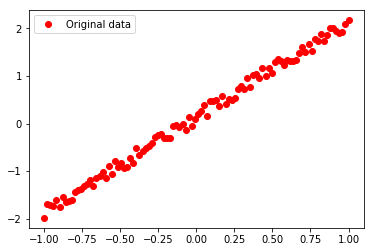

In [4]:
train_x=np.linspace(-1,1,100)
train_y=2*train_x+np.random.rand(*train_x.shape)*0.3
plt.plot(train_x,train_y,'ro',label='Original data')
plt.legend()
plt.show()

Epoch: 1 cost= 1.2856487 W= [0.26041976] b= [0.6451088]
Epoch: 3 cost= 0.11500227 W= [1.5274309] b= [0.3233566]
Epoch: 5 cost= 0.015520318 W= [1.8729309] b= [0.19354016]
Epoch: 7 cost= 0.008465065 W= [1.9625671] b= [0.15918922]
Epoch: 9 cost= 0.007913836 W= [1.9857495] b= [0.15029393]
Epoch: 11 cost= 0.007856527 W= [1.9917444] b= [0.14799346]
Epoch: 13 cost= 0.007847408 W= [1.9932944] b= [0.1473987]
Epoch: 15 cost= 0.007845428 W= [1.9936955] b= [0.14724478]
Epoch: 17 cost= 0.007844943 W= [1.9937991] b= [0.14720505]
Epoch: 19 cost= 0.0078448225 W= [1.9938252] b= [0.147195]
Finish!
cost= 0.007844802 W= [1.9938298] b= [0.14719321]


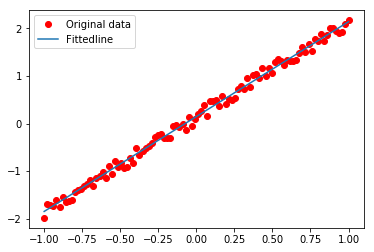

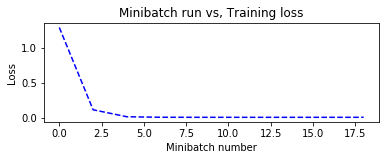

In [12]:
# 线性回归
X=tf.placeholder('float')
Y=tf.placeholder('float')
W=tf.Variable(tf.random_normal([1]),name='weight')
b=tf.Variable(tf.zeros([1]),name='bias')
z=tf.multiply(X,W)+b

cost=tf.reduce_mean(tf.square(Y-z))
learning_rate=0.01
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 初始化所有变量
init=tf.global_variables_initializer()
training_epochs=20
display_step=2

# 启动 session
with tf.Session() as sess:
    sess.run(init)
    plotdata={"batchsize":[],"loss":[]}
    
    for epoch in range(training_epochs):
        for (x,y) in  zip(train_x,train_y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        
        # 显示训练中的详细信息
        if epoch % display_step==0:
            loss=sess.run(cost,feed_dict={X:train_x,Y:train_y})
            print("Epoch:",epoch+1,"cost=",loss,"W=",sess.run(W),"b=",sess.run(b))
            if not (loss=="NA"):
                plotdata['batchsize'].append(epoch)
                plotdata['loss'].append(loss)
    print("Finish!")
    print("cost=",sess.run(cost,feed_dict={X:train_x,Y:train_y}),"W=",sess.run(W),"b=",sess.run(b))
    plt.plot(train_x,train_y,'ro',label='Original data')
    plt.plot(train_x,sess.run(W)*train_x+sess.run(b),label='Fittedline')
    plt.legend()
    plt.show()

    plotdata['avgloss']=moving_average(plotdata['loss'])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata['batchsize'],plotdata['avgloss'],'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs, Training loss')
    plt.show()

# 图形显示
plotdata={'batchsize':[],'loss':[]}
def moving_average(a,w=10):
    if len(a)<w:
        return a[:]
    return [val if idx<w else sum(a[(idx-w):idx])/w for idx ,val in enumerate(a)]
